Customer Segmentaion

1. Importing modules :

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Reading the dataset from local file :

In [45]:
df = pd.read_csv('mall_customer.csv')

3. Understanding the dataset :

In [46]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [47]:
df.rename(columns={'Genre':'Gender'},inplace=True)

In [48]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [49]:
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [50]:
df.shape

(200, 5)

4. Checking the data set for null values :

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


5. Preparing data for clustering :

In [52]:
X = df.iloc[:, [3,4]].values

In [53]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

5. Clustering :

In [54]:
from sklearn.cluster import KMeans
wcss = []

In [55]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


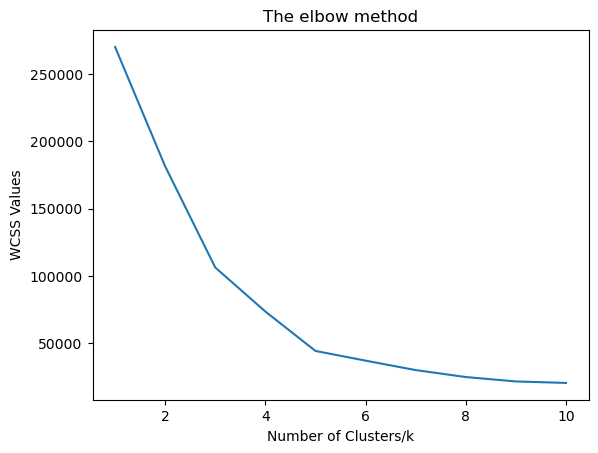

In [56]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters/k')
plt.ylabel('WCSS Values')
plt.show()

Initializing our KMeans Model :

In [57]:
kmeansmodel = KMeans(n_clusters = 5, init='k-means++', random_state=0)

In [58]:
y_means = kmeansmodel.fit_predict(X)

Text(0, 0.5, 'Spending Scores (1-100)')

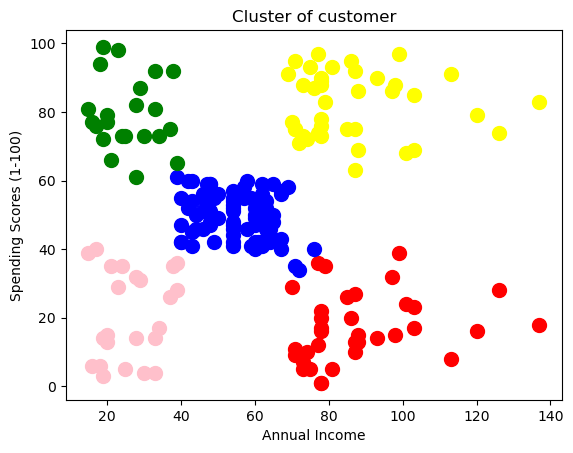

In [59]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], s=100, c = "red", label='C Type 1')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], s=100, c = "blue", label='C Type 2')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], s=100, c = "yellow", label='C Type 3')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], s=100, c = "green", label='C Type 4')
plt.scatter(X[y_means == 4,0], X[y_means == 4,1], s=100, c = "pink", label='C Type 5')
plt.title('Cluster of customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Scores (1-100)')

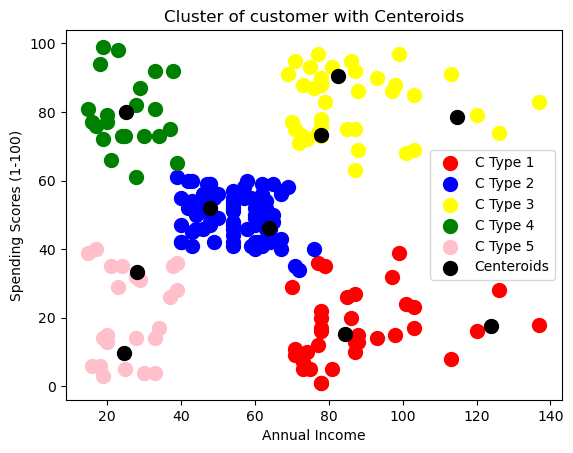

In [60]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], s=100, c = "red", label='C Type 1')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], s=100, c = "blue", label='C Type 2')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], s=100, c = "yellow", label='C Type 3')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], s=100, c = "green", label='C Type 4')
plt.scatter(X[y_means == 4,0], X[y_means == 4,1], s=100, c = "pink", label='C Type 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c = "black", label='Centeroids')
plt.title('Cluster of customer with Centeroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Scores (1-100)')
plt.legend()
plt.show()

Representation of data in different aspects :

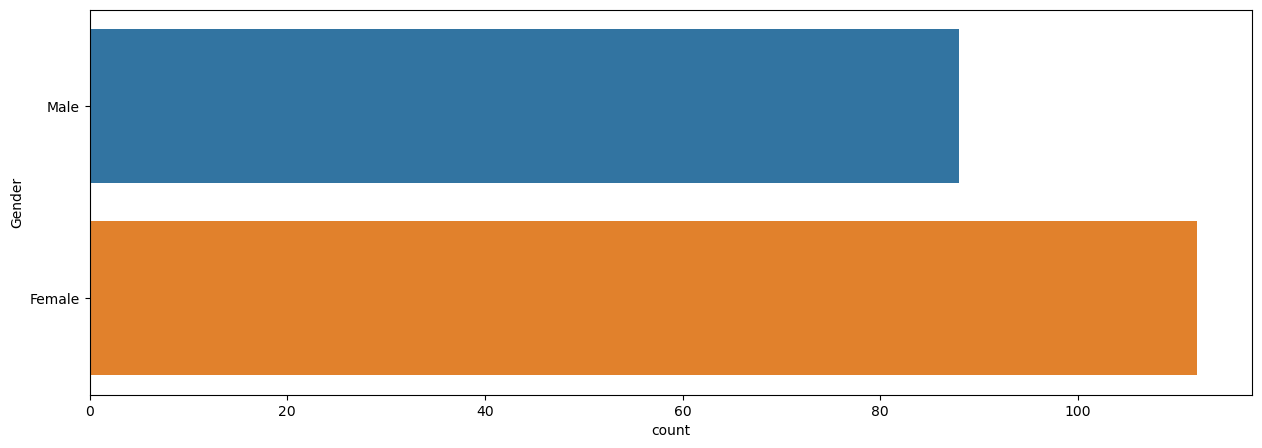

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

Number of customers with respect to different age groups :

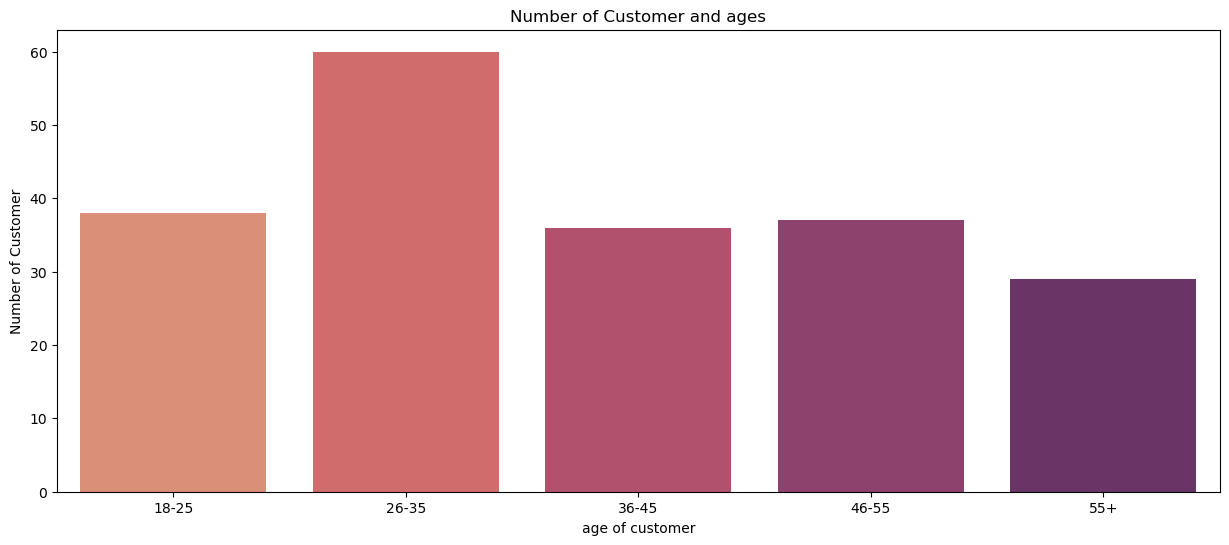

In [62]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]
agex = ["18-25", "26-35" , "36-45" , "46-55" , "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="flare")
plt.title('Number of Customer and ages')
plt.xlabel('age of customer')
plt.ylabel('Number of Customer')
plt.show()